

# New Section

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("central_bank_india.csv")


numeric_cols = data.select_dtypes(include=[np.number]).columns
X_cls = data[numeric_cols]
y_cls = np.where(data['Close'].diff() > 0, 1, 0)


scaler = MinMaxScaler()
X_cls_normalized = scaler.fit_transform(X_cls)


X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls_normalized, y_cls, test_size=0.2, random_state=42)
X_cls_train, X_cls_val, y_cls_train, y_cls_val = train_test_split(X_cls_train, y_cls_train, test_size=0.2, random_state=42)


classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_cls_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
classification_model.compile(optimizer=Adam(), loss='binary_crossentropy')


classification_model.fit(X_cls_train, y_cls_train, epochs=500, batch_size=32, validation_data=(X_cls_val, y_cls_val))


y_cls_pred_proba = classification_model.predict(X_cls_test)
y_cls_pred = (y_cls_pred_proba > 0.5).astype(int)


accuracy_cls = accuracy_score(y_cls_test, y_cls_pred)
precision_cls = precision_score(y_cls_test, y_cls_pred)
recall_cls = recall_score(y_cls_test, y_cls_pred)
f1_cls = f1_score(y_cls_test, y_cls_pred)

print("Classification Metrics:")
print("Accuracy:", accuracy_cls)
print("Precision:", precision_cls)
print("Recall:", recall_cls)
print("F1 Score:", f1_cls)


Epoch 1/500
50/50 [==============================] - 1s 9ms/step - loss: 0.6936 - val_loss: 0.6901
Epoch 2/500
50/50 [==============================] - 0s 4ms/step - loss: 0.6921 - val_loss: 0.6901
Epoch 3/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6914 - val_loss: 0.6895
Epoch 4/500
50/50 [==============================] - 0s 4ms/step - loss: 0.6916 - val_loss: 0.6887
Epoch 5/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6910 - val_loss: 0.6881
Epoch 6/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6906 - val_loss: 0.6880
Epoch 7/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6912 - val_loss: 0.6877
Epoch 8/500
50/50 [==============================] - 0s 3ms/step - loss: 0.6905 - val_loss: 0.6878
Epoch 9/500
50/50 [==============================] - 0s 3ms/step - loss: 0.6897 - val_loss: 0.6897
Epoch 10/500
50/50 [==============================] - 0s 2ms/step - loss: 0.6908 - val_loss: 0.6876
Epoch 11/

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_cls_normalized, data['Close'], test_size=0.2, random_state=42)
X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(X_reg_train, y_reg_train, test_size=0.2, random_state=42)


regression_model = Sequential([
    Dense(29, activation='tanh', input_shape=(X_reg_train.shape[1],)),
    Dense(19, activation='sigmoid'),
    Dense(1)
])
regression_model.compile(optimizer=Adam(), loss='mse')


regression_model.fit(X_reg_train, y_reg_train, epochs=150, batch_size=32, validation_data=(X_reg_val, y_reg_val))


y_reg_pred = regression_model.predict(X_reg_test)
predictions = y_reg_pred


mae_reg = mean_absolute_error(y_reg_test, y_reg_pred)
mse_reg = mean_squared_error(y_reg_test, y_reg_pred)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y_reg_test, y_reg_pred)

print("\nRegression Metrics:")
print("Mean Absolute Error:", mae_reg)
print("Mean Squared Error:", mse_reg)
print("Root Mean Squared Error:", rmse_reg)
print("R2 Score:", r2_reg)


Epoch 1/150
50/50 [==============================] - 1s 5ms/step - loss: 3543.8157 - val_loss: 3570.9248
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 3404.0549 - val_loss: 3436.7112
Epoch 3/150
50/50 [==============================] - 0s 3ms/step - loss: 3289.8630 - val_loss: 3344.1702
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 3212.8196 - val_loss: 3279.3291
Epoch 5/150
50/50 [==============================] - 0s 2ms/step - loss: 3152.8037 - val_loss: 3221.0544
Epoch 6/150
50/50 [==============================] - 0s 3ms/step - loss: 3095.5046 - val_loss: 3163.7957
Epoch 7/150
50/50 [==============================] - 0s 3ms/step - loss: 3037.5942 - val_loss: 3101.9990
Epoch 8/150
50/50 [==============================] - 0s 2ms/step - loss: 2974.7646 - val_loss: 3035.6494
Epoch 9/150
50/50 [==============================] - 0s 2ms/step - loss: 2902.5610 - val_loss: 2958.7087
Epoch 10/150
50/50 [==============================] - 0

In [ ]:

def calculate_technical_indicators(data):

    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()


    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))


    data['EMA12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data.dropna(inplace=True)
    return data

data = calculate_technical_indicators(data)

In [ ]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume,MA5,MA20,RSI,EMA12,EMA26,MACD
19,19,2024-03-05,62.80,67.95,62.33,67.37,"3,222,510",63.874,60.7815,68.181818,62.055782,61.932078,0.123703
20,20,2024-03-04,63.81,64.18,62.41,62.93,"977,841",64.406,60.6810,57.418112,62.190277,62.005998,0.184278
21,21,2024-03-01,63.01,63.95,62.75,63.28,"1,299,897",64.624,60.5640,56.581532,62.357926,62.100369,0.257558
22,22,2024-02-29,60.51,63.05,60.22,62.68,"1,786,668",64.286,60.5385,58.142665,62.407476,62.143304,0.264172
23,23,2024-02-28,63.89,63.89,60.36,61.05,"2,239,369",63.462,60.4195,57.199603,62.198634,62.062319,0.136315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2463,2014-04-11,51.15,51.70,50.50,51.15,"138,072",50.580,52.5325,44.186047,51.843798,56.429297,-4.585499
2460,2464,2014-04-10,52.00,52.80,50.70,51.20,"452,400",50.610,52.0325,35.483871,51.744752,56.041941,-4.297190
2461,2465,2014-04-09,50.70,52.20,50.40,51.90,"229,396",50.960,51.8550,40.000000,51.768636,55.735131,-3.966495
2462,2466,2014-04-07,50.30,53.50,49.65,50.55,"57,447",51.160,51.7200,31.944444,51.581154,55.351047,-3.769893


In [ ]:
data.isna().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
MA5           0
MA20          0
RSI           0
EMA12         0
EMA26         0
MACD          0
dtype: int64

In [ ]:

data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MACD'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean() - data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # Moving Average Convergence Divergence (MACD)


data['HighMinusLow'] = data['High'] - data['Low']
data['OpenMinusClose'] = data['Open'] - data['Close']

In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume,MA5,MA20,RSI,EMA12,EMA26,MACD,MA10,MA50,HighMinusLow,OpenMinusClose
19,19,2024-03-05,62.80,67.95,62.33,67.37,"3,222,510",63.874,60.7815,68.181818,62.055782,61.932078,0.000000,NaN,NaN,5.62,-4.57
20,20,2024-03-04,63.81,64.18,62.41,62.93,"977,841",64.406,60.6810,57.418112,62.190277,62.005998,-0.354188,NaN,NaN,1.77,0.88
21,21,2024-03-01,63.01,63.95,62.75,63.28,"1,299,897",64.624,60.5640,56.581532,62.357926,62.100369,-0.599729,NaN,NaN,1.20,-0.27
22,22,2024-02-29,60.51,63.05,60.22,62.68,"1,786,668",64.286,60.5385,58.142665,62.407476,62.143304,-0.833134,NaN,NaN,2.83,-2.17
23,23,2024-02-28,63.89,63.89,60.36,61.05,"2,239,369",63.462,60.4195,57.199603,62.198634,62.062319,-1.136534,NaN,NaN,3.53,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2463,2014-04-11,51.15,51.70,50.50,51.15,"138,072",50.580,52.5325,44.186047,51.843798,56.429297,-4.585499,50.66,66.926,1.20,0.00
2460,2464,2014-04-10,52.00,52.80,50.70,51.20,"452,400",50.610,52.0325,35.483871,51.744752,56.041941,-4.297190,50.72,66.455,2.10,0.80
2461,2465,2014-04-09,50.70,52.20,50.40,51.90,"229,396",50.960,51.8550,40.000000,51.768636,55.735131,-3.966495,50.79,65.990,1.80,-1.20
2462,2466,2014-04-07,50.30,53.50,49.65,50.55,"57,447",51.160,51.7200,31.944444,51.581154,55.351047,-3.769893,50.77,65.502,3.85,-0.25


In [ ]:
valid_sorted = valid.sort_index()
valid_sorted

,Actual Close,Predicted Close Value
18,65.17,66.106010
29,65.85,66.758240
43,57.46,57.115170
44,56.07,56.504654
48,52.96,54.674183
...,...,...
2444,52.35,52.782562
2448,54.45,54.686760
2455,51.05,50.802261
2458,51.00,51.187241


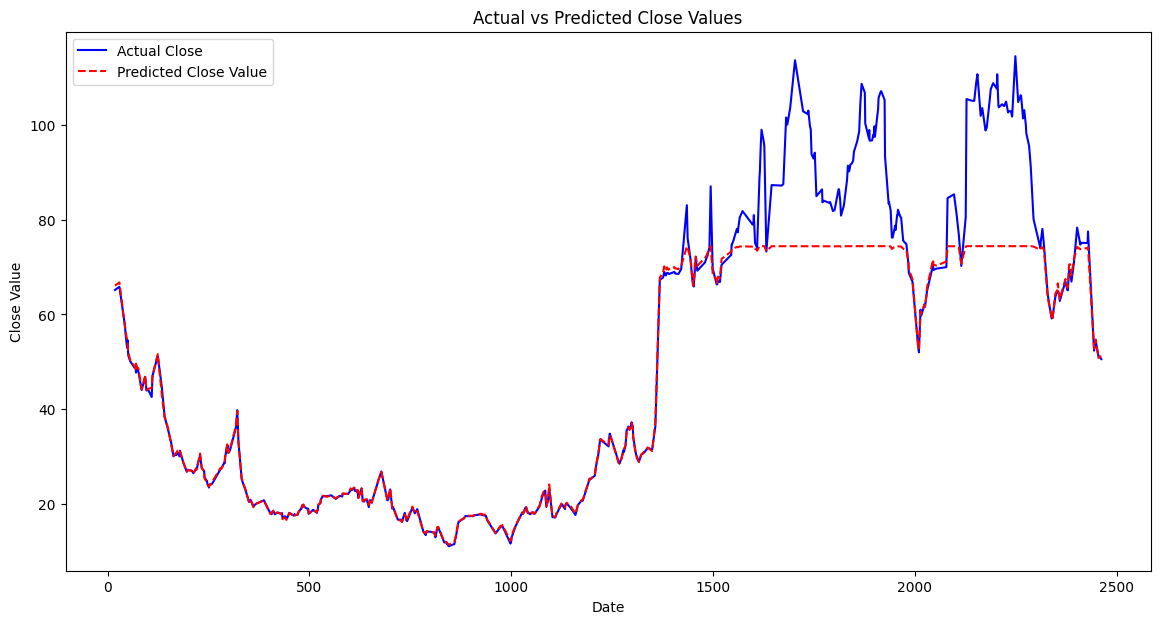

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted.index, valid_sorted['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted.index, valid_sorted['Predicted Close Value'], label='Predicted Close Value', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()
plt.show()
